Предсказание площади лесных пожаров. На основе погодных измерений необходимо предсказать объем выгоревших лесных массивов на севере Португалии. Выборка состоит из 13 признаков и 517 объектов. Для решения задачи предлагается использовать метод наименьших квадратов с регуляризацией. Нарисовать график весов признаков и общей ошибки на кросс-валидации при изменении параметра регуляризации. Какие признаки наиболее важны для нашей задачи? Что изменится, если предварительно все признаки стандартизовать?

In [78]:
import numpy as np
import urllib.request
import pandas as pd
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt


In [79]:
# url with dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
# download the file
raw_data = urllib.request.urlopen(url)
work_data = pd.read_csv(raw_data)





,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [80]:
X_param=work_data[["X","Y","month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]].values
Y_answer=work_data[['area']].values

переведем текстовые данные в числовые значения  

In [82]:
#text data to num data
month=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
days=['mon','tue','wed','thu','fri','sat','sun']

for i in range(len(Y_answer)):
    counter_month=0.0
    counter_days=0.0
    for k in month:
        counter_month=counter_month+1.0
        if (X_param[i,2]==k):
            X_param[i,2]=counter_month
        
    for k in days:
        counter_days=counter_days+1.0
        if (X_param[i,3]==k):
            X_param[i,3]=counter_days
            


Обучаем модель для разных значений параметра регуляризации на первых 300 примерах

In [111]:

alphas=np.arange(0.1,10.1,0.2)
coef=np.zeros((alphas.shape[0], X_param.shape[1]))


count_coef=0
for met in alphas:
    regression_Lasso = Lasso(met)
    regression_Lasso.fit(X_param[:300,],Y_answer[:300])
    coef[count_coef,:]=regression_Lasso.coef_ 
    count_coef+=1



[[ 1.57446440e+00  8.14810020e-01  2.07700647e+00  2.11525854e+00
   2.34205496e-01  1.67282377e-01 -1.16653909e-02 -1.27219755e+00
  -4.37727075e-02 -3.99928668e-01  3.90418156e-01 -0.00000000e+00]
 [ 1.56704130e+00  7.05681349e-01  1.95501672e+00  2.05883676e+00
   2.05196372e-01  1.65226534e-01 -1.04900908e-02 -1.24285176e+00
  -4.02022692e-02 -3.98859428e-01  3.36476725e-01 -0.00000000e+00]
 [ 1.55962591e+00  5.96530663e-01  1.83310863e+00  2.00241356e+00
   1.76190827e-01  1.63172981e-01 -9.31592191e-03 -1.21351092e+00
  -3.66273957e-02 -3.97789098e-01  2.82523757e-01 -0.00000000e+00]
 [ 1.55219664e+00  4.87419504e-01  1.71105397e+00  1.94599291e+00
   1.47178887e-01  1.61115308e-01 -8.13972245e-03 -1.18416119e+00
  -3.30604098e-02 -3.96720710e-01  2.28591531e-01 -0.00000000e+00]
 [ 1.54476903e+00  3.78303643e-01  1.58901675e+00  1.88957195e+00
   1.18167710e-01  1.59058124e-01 -6.96376457e-03 -1.15481253e+00
  -2.94924817e-02 -3.95652090e-01  1.74656839e-01 -0.00000000e+00]
 [ 1.

считаем функционал ошибки на остальной выборке

In [168]:
names=["X","Y","month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

funk_mistake=np.zeros(len(alphas))
for alph in range(len(alphas)):
    
    mistake=0.0
    for i in range(300,517):
        sum=0.0
        for k in range(len(names)):
        
            sum+=(coef[alph,k]*X_param[i,k])
          
        mistake+=(sum-Y_answer[i])**2
    funk_mistake[alph]=mistake
funk_mistake=funk_mistake/(max(funk_mistake))    

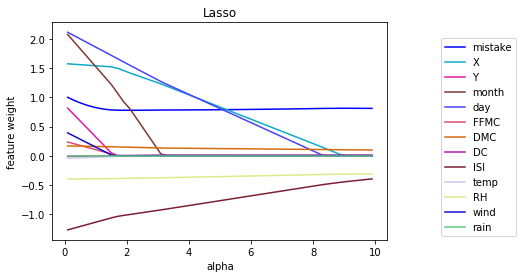

In [170]:
names=["X","Y","month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
plt.plot(alphas, funk_mistake, label='cited mistake', color='b')
for i in range(len(names)):
    plt.plot(alphas, coef[:,i], label=names[i], color=np.random.rand(3))
   
    plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
    plt.xlabel("alpha")
    plt.ylabel("feature weight")
    plt.title("Lasso")
#https://github.com/Filareth2015/DA_and_ML_Python/blob/master/1.2.%20Линейная%20регрессия%20-%20переобучение%20и%20регуляризация.ipynb
    


Из графика видно, что основными показателями, влияющими на распространение пожара являются ISI,RH,X,DMC
Кроме того, заметно,что при увеличении параметра регуляризации происходит сначало увеличение точности модели, после чего ухудшение, при альфа>2
При стандартизации параметров мы увеличиваем скорость регуляризации

In [ ]:
Далее стандартизую входные данные и считаю все тоже самое

In [175]:
for t in range(len(names)):
    X_param[:,t]=X_param[:,t]/(max(X_param[:,t]))
alphas=np.arange(0.1,3,0.2)
coef=np.zeros((alphas.shape[0], X_param.shape[1]))


count_coef=0
for met in alphas:
    regression_Lasso = Lasso(met)
    regression_Lasso.fit(X_param[:300,],Y_answer[:300])
    coef[count_coef,:]=regression_Lasso.coef_ 
    count_coef+=1

In [183]:
names=["X","Y","month","day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]

funk_mistake=np.zeros(len(alphas))
for alph in range(len(alphas)):
    
    mistake=0.0
    for i in range(300,517):
        sum=0.0
        for k in range(len(names)):
        
            sum+=(coef[alph,k]*X_param[i,k])
          
        mistake+=(sum-Y_answer[i])**2
    funk_mistake[alph]=mistake
funk_mistake=funk_mistake/300000


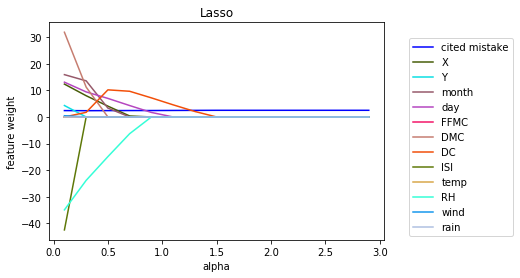

In [184]:
plt.plot(alphas, funk_mistake, label='cited mistake', color='b')
for i in range(len(names)):
    plt.plot(alphas, coef[:,i], label=names[i], color=np.random.rand(3))
   
    plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
    plt.xlabel("alpha")
    plt.ylabel("feature weight")
    plt.title("Lasso")
#https://github.com/Filareth2015/DA_and_ML_Python/blob/master/1.2.%20Линейная%20регрессия%20-%20переобучение%20и%20регуляризация.ipynb
    
